<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/CNN/CNN_How_CNN_sees_the_world_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
model = VGG16(weights = 'imagenet', include_top = False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [0]:
def deprocess(img):
    img -= img.mean()
    img /= img.std()
    
    img*=0.1
    img+=0.5
    
    img = np.clip(img, 0,1)
    
    return img   

In [0]:
def generate_pattern(layer_name, filter_index, size = 150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    grads /= K.sqrt(K.mean(K.sqrt(grads)) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_image = np.random.random((1,size, size, 3))*20+128
    
    step = 1.
    
    loss_value, grads_value = iterate([np.zeros((1,150,150,3))])
    for i in range(60):
        loss_value, grads_value = iterate([input_image])
        input_image += grads_value*step
        

    img = input_image[0] # we don't need a batch size dimension
    
    return deprocess(img)    

In [0]:
def gen_64_patterns(name, size, margin = 5):
    results = np.zeros((8*size + 7*margin, 8*size + 7*margin,3))
    
    layer_name = name
    for i in range(8):
        for j in range(8):
            filter_image = generate_pattern(layer_name, i + j*8, size)
            
            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            
            results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_image.astype('float64')
    
    
    plt.figure(figsize = (20,20))
    plt.imshow(results)

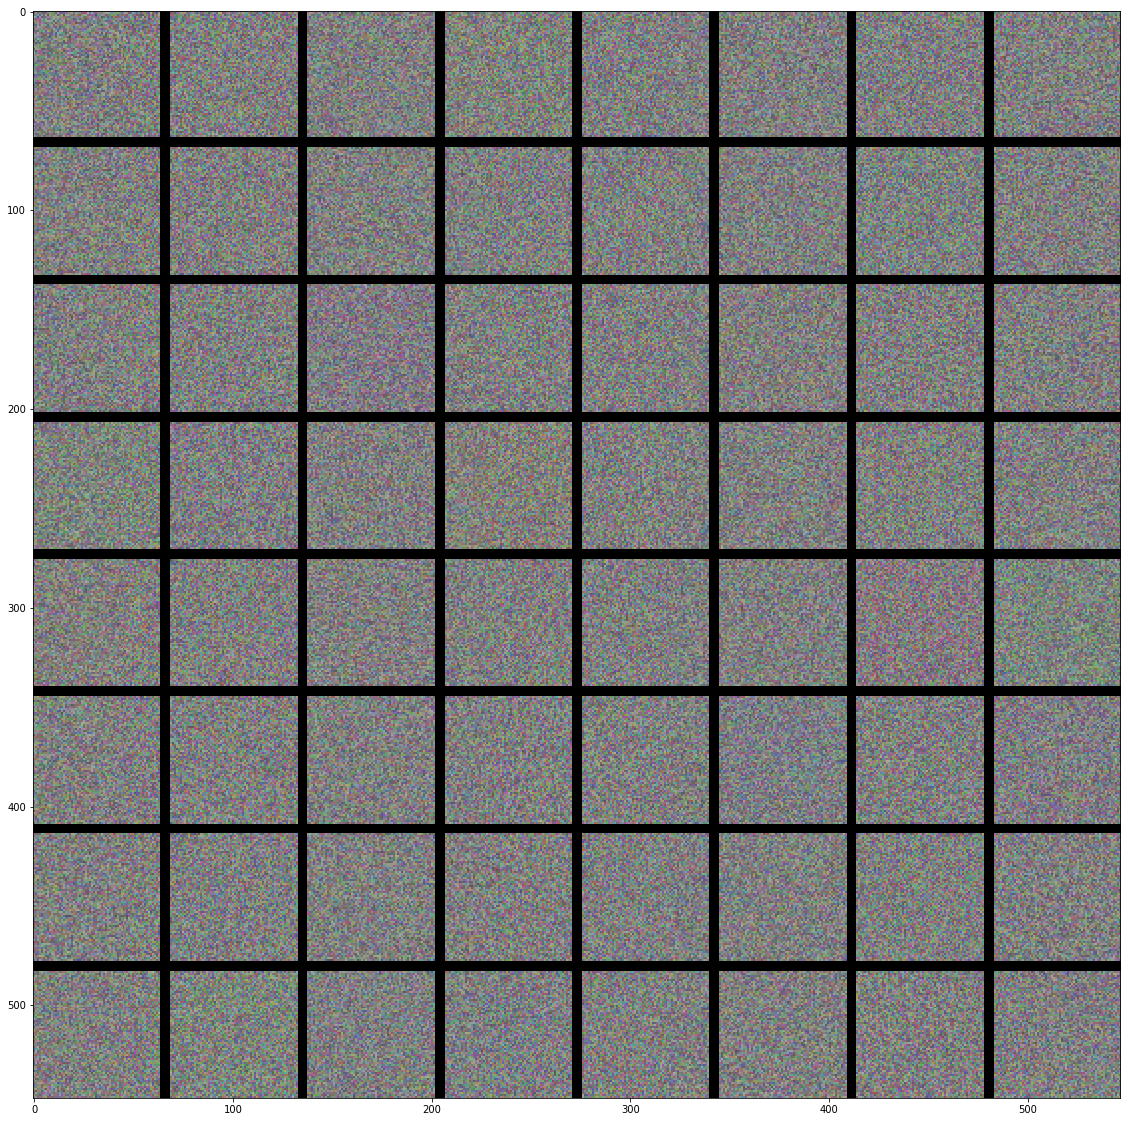

In [0]:
gen_64_patterns('block1_conv2', size= 64, margin = 5)

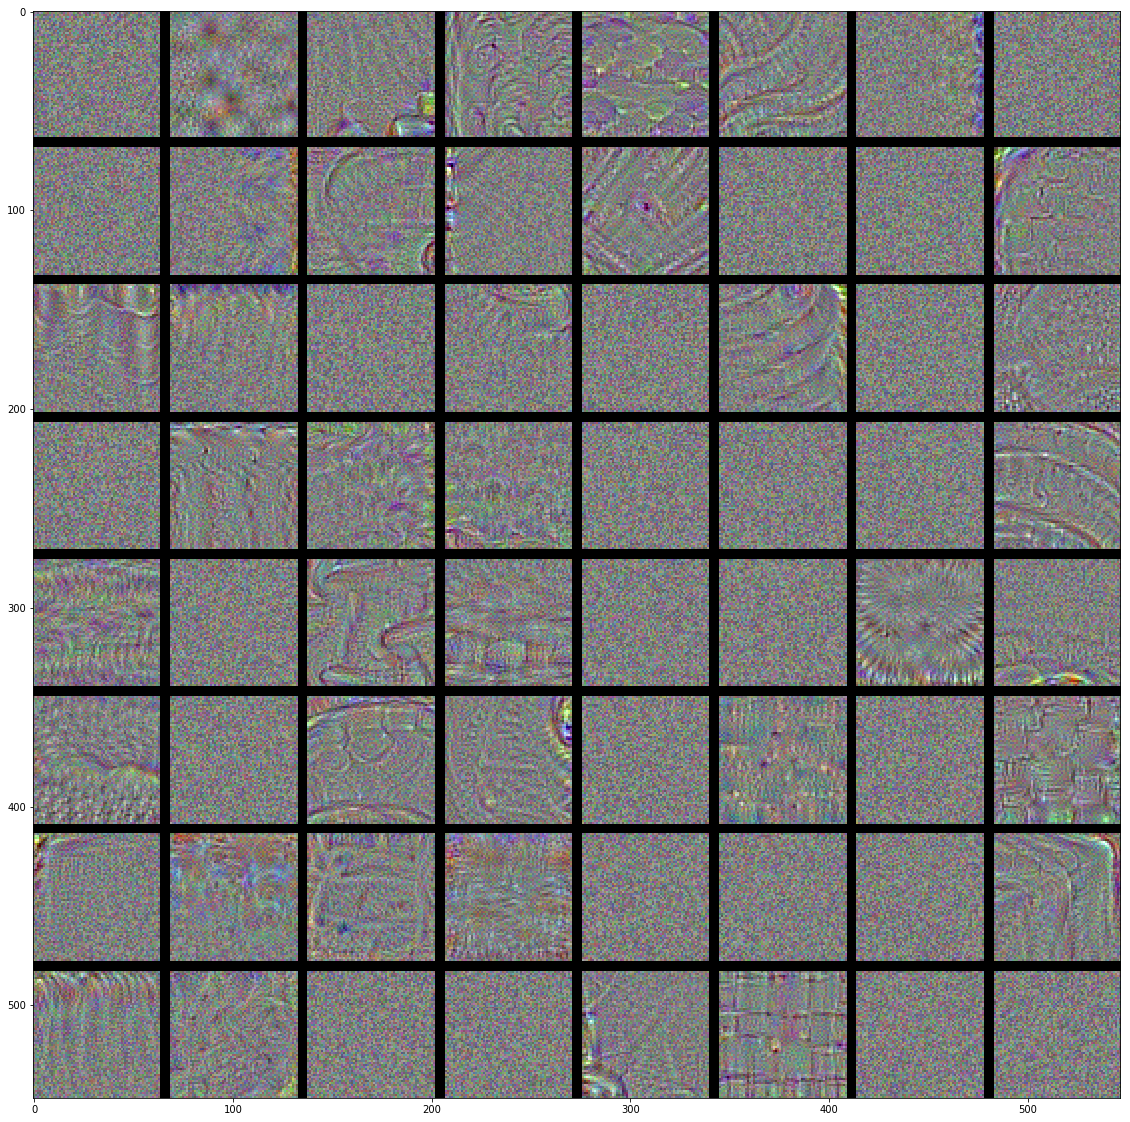

In [0]:
gen_64_patterns('block4_pool', size= 64, margin = 5)

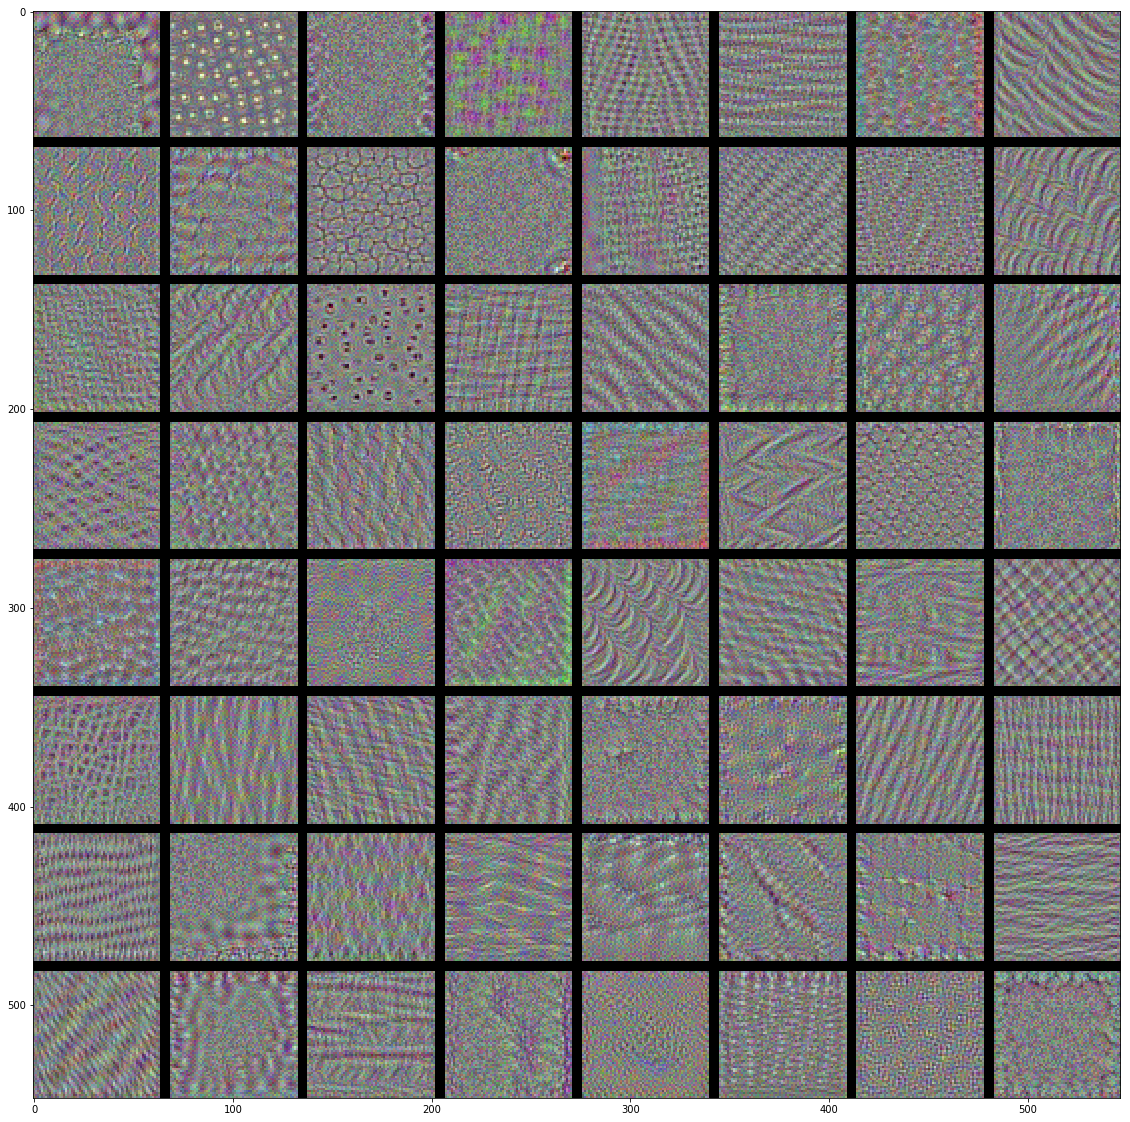

In [0]:
gen_64_patterns('block3_conv2', size= 64, margin = 5)

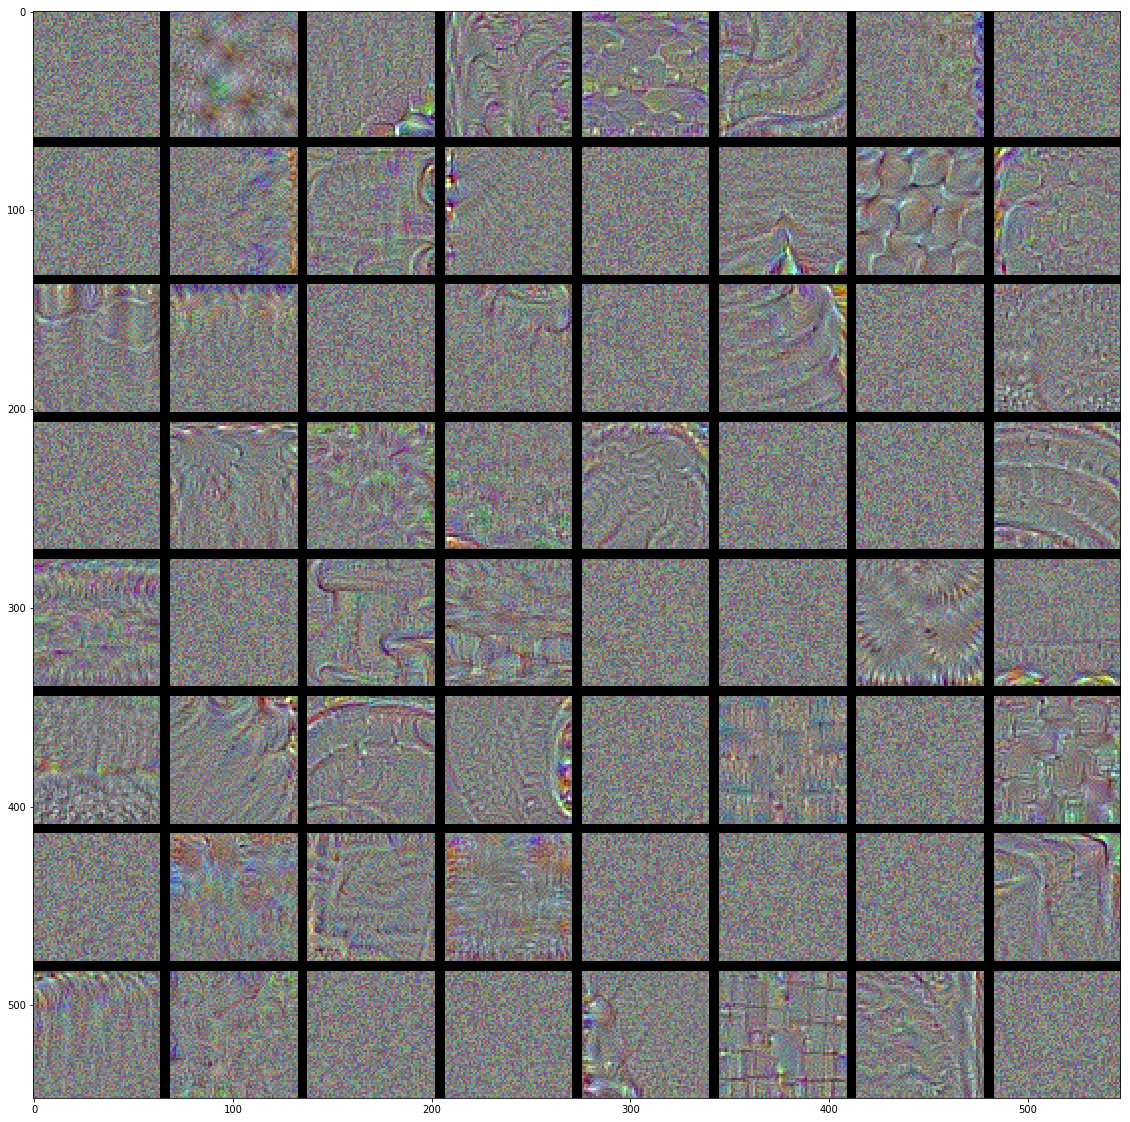

In [0]:
gen_64_patterns('block4_pool', size= 64, margin = 5)

In [0]:
gen_64_patterns('block5_conv3', size= 64, margin = 5)